In [7]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import tomotopy as tp
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pyLDAvis
from nltk.corpus import stopwords
from wordcloud import WordCloud
from IPython.display import IFrame

In [2]:
data = pd.read_csv("./cleaned_train.csv")

data = data[data['tweet'].notna()]
print(data.head())

           id                                              tweet  sentiment  \
0  1984780688  good look tonight cant wait see new moon trail...          1   
1  2014160062  wish best friend happy married life may god bl...          1   
2  2014068213  wish best friend happy married life may god bl...          1   
3  2187752404  hope get better hope get better hope get bette...          1   
4  1966284496  loving life right best job best friend best li...          1   

   polarity_vader  
0          0.9885  
1          0.9882  
2          0.9865  
3          0.9859  
4          0.9858  


In [3]:
print(tp.isa)
mdl = tp.PAModel(tw=tp.TermWeight.ONE, min_cf=0, min_df=0, rm_top=5, k1=5, k2=10, alpha=0.1, subalpha=0.1, eta=0.01,
                 seed=3, corpus=None, transform=None)

sse2


In [ ]:
for i in range(len(data)):
    mdl.add_doc(data.iloc[i]['tweet'].split())

In [ ]:
for i in range(0, 100, 20):
    mdl.train(20)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

mdl.save("./pam_model4.bin")

In [4]:
mdl = tp.PAModel.load("./pam_model4.bin")

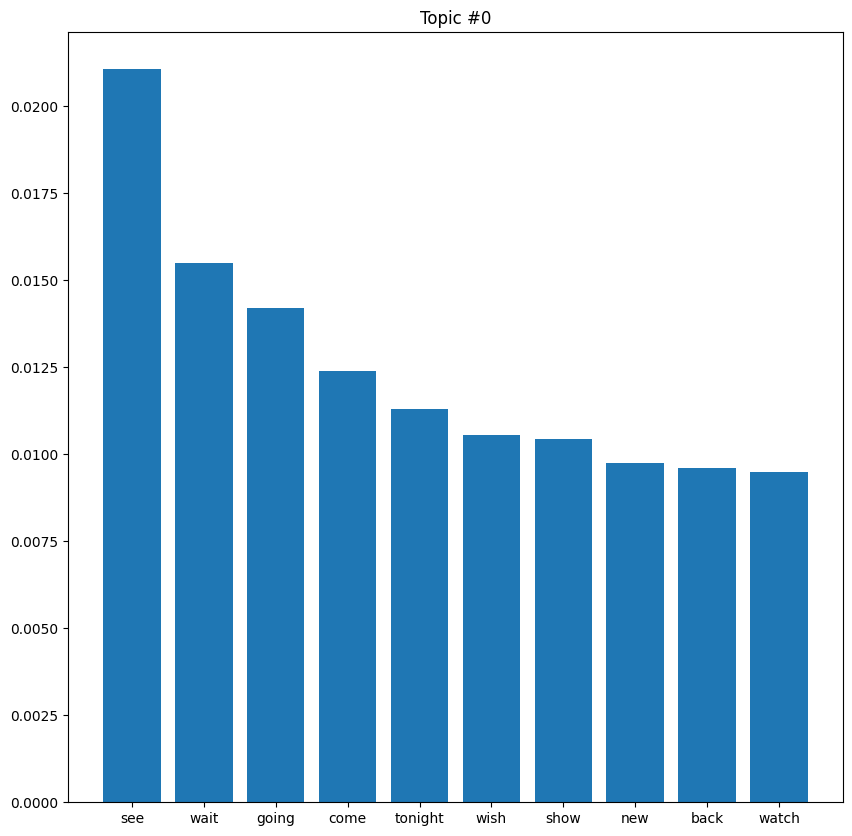

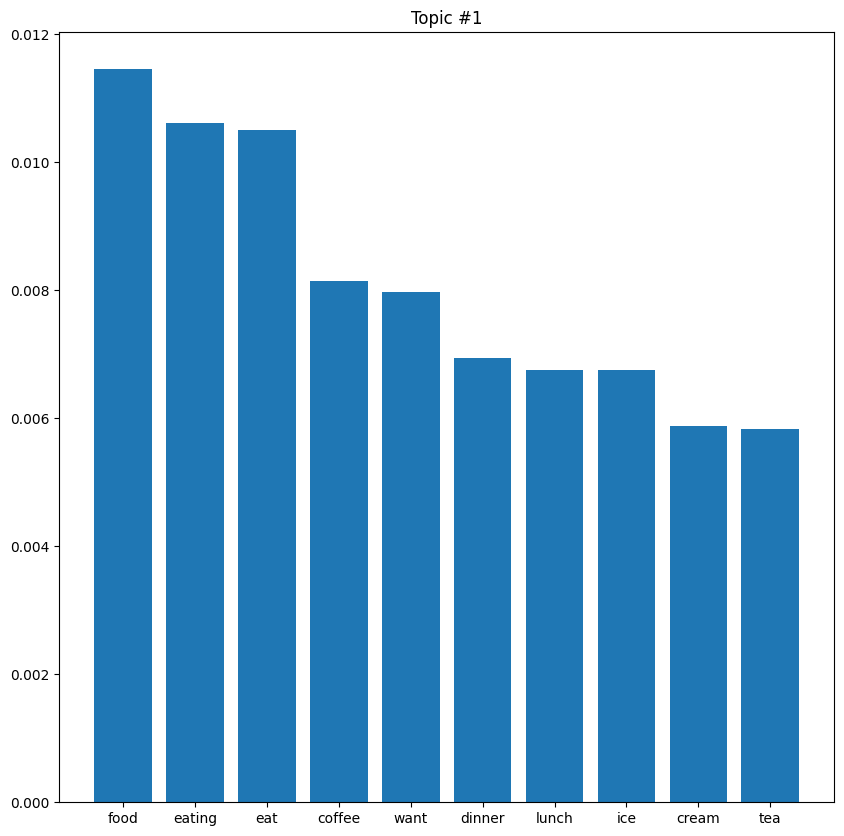

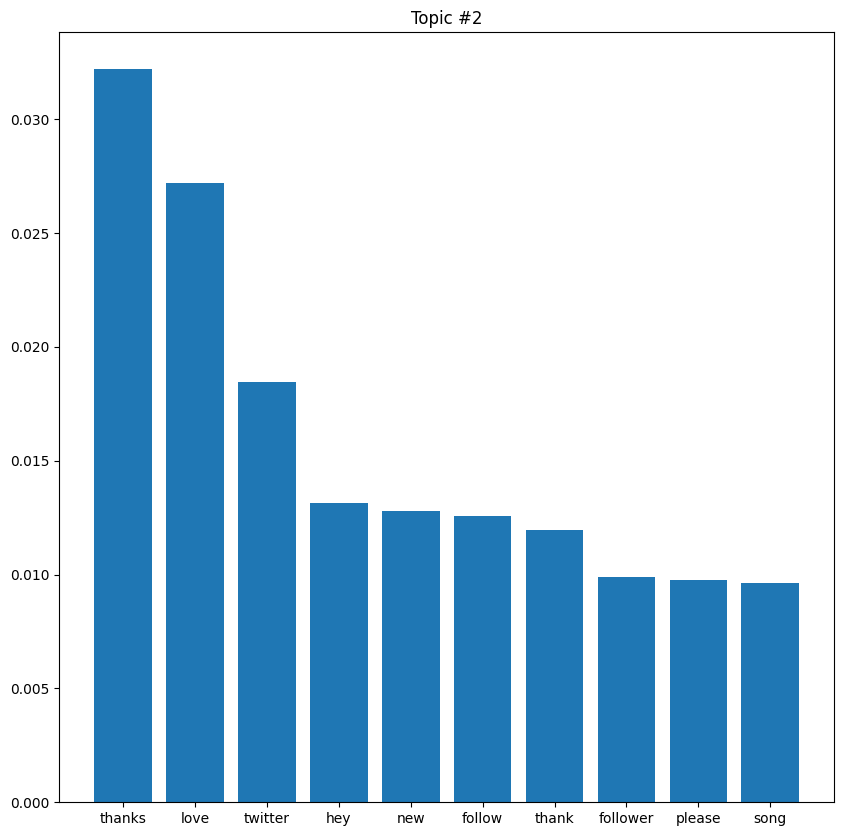

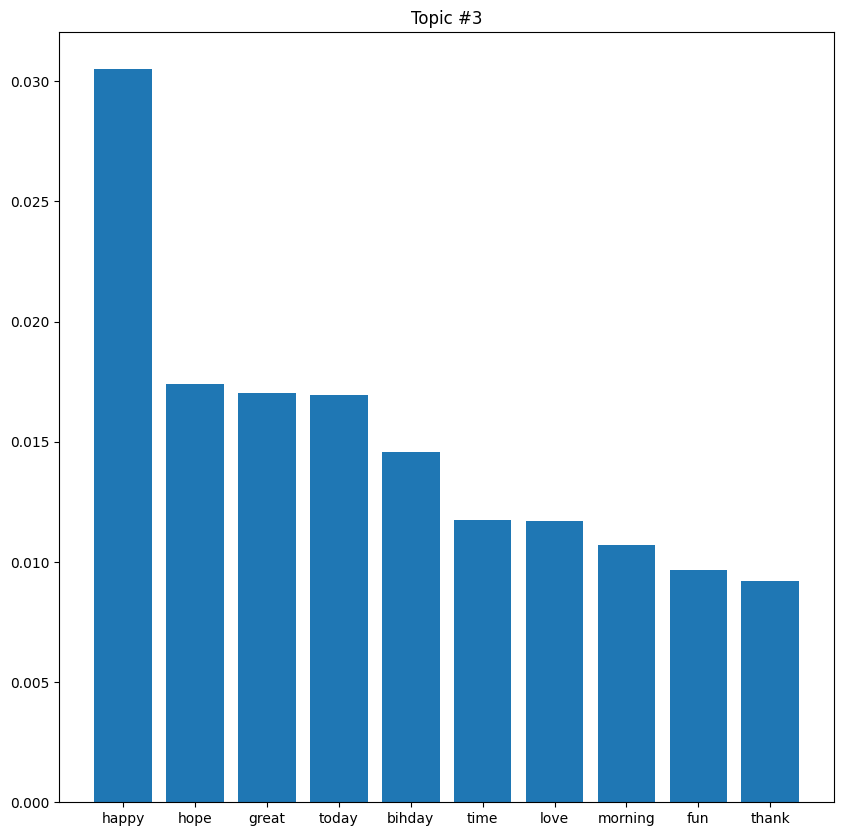

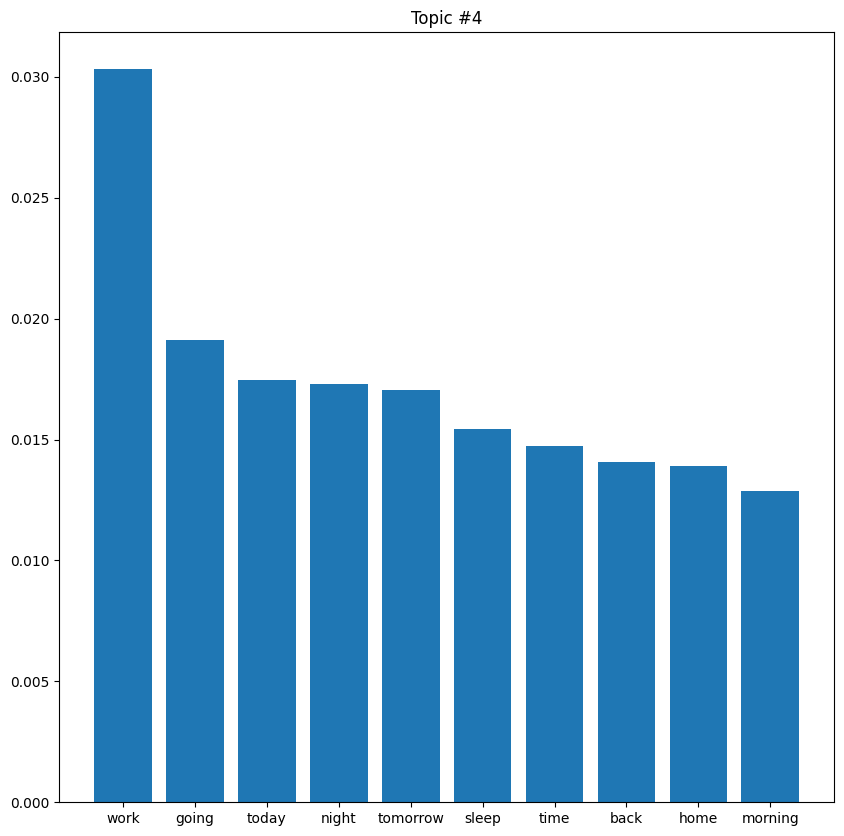

In [6]:
for k in range(mdl.k1):
    mpl.pyplot.figure(figsize=(10, 10))
    mpl.pyplot.title("Topic #{}".format(k))
    mpl.pyplot.bar(*zip(*mdl.get_topic_words(k, top_n=10)))
    mpl.pyplot.show()

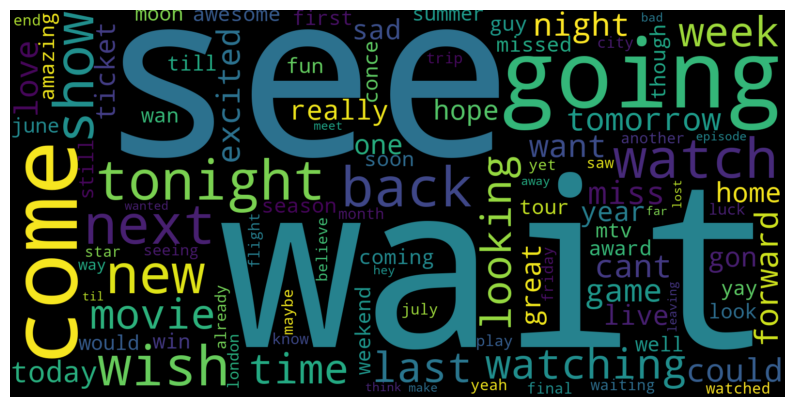

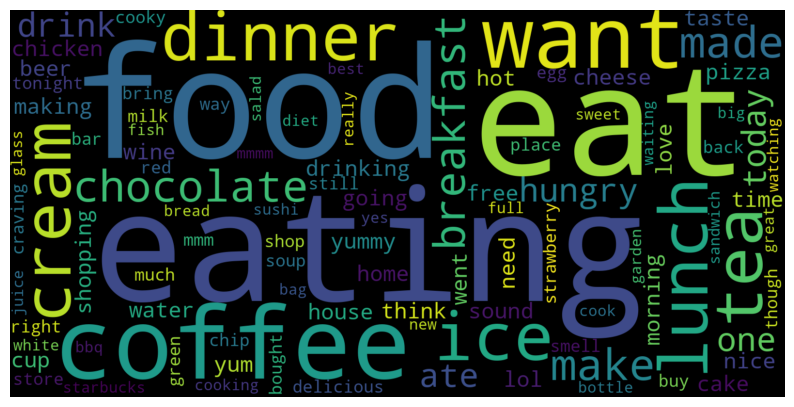

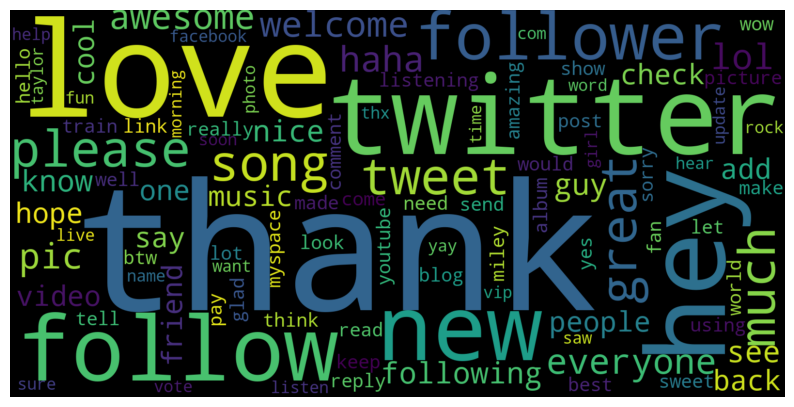

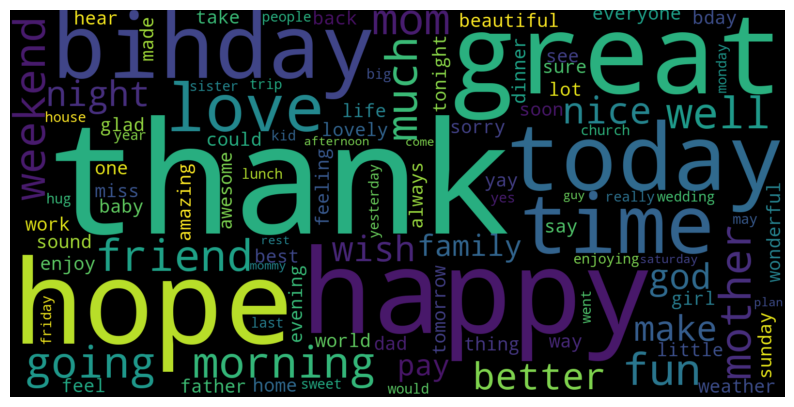

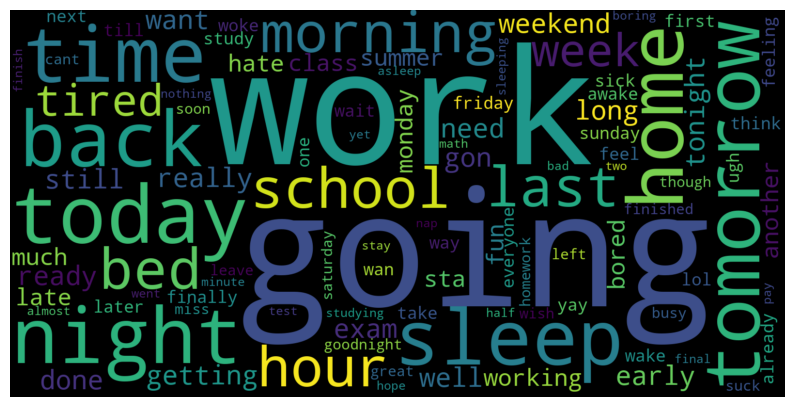

In [8]:
for k in range(mdl.k1):
    mpl.pyplot.figure(figsize=(10, 10))
    STOPWORDS = set(stopwords.words('english'))
    wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=STOPWORDS).generate(
        ' '.join([w for w, _ in mdl.get_topic_words(k, top_n=100)]))
    mpl.pyplot.imshow(wordcloud, interpolation='bilinear')
    mpl.pyplot.axis("off")
    mpl.pyplot.show()

In [9]:
mdl.summary()

<Basic Info>
| PAModel (current version: 0.12.3)
| 1588856 docs, 9849414 words
| Total Vocabs: 236999, Used Vocabs: 236994
| Entropy of words: 8.16511
| Entropy of term-weighted words: 8.16511
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 100, Burn-in steps: 0
| Optimization Interval: 1
| Log-likelihood per word: -10.63129
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 5 (the number of top words to be removed)
| k1: 5 (the number of super topics between 1 ~ 32767)
| k2: 10 (the number of sub topics between 1 ~ 32767)
| alpha: [0.1] (initial hyperparameter of Dirichlet distribution for document-super topic, given as a single `float` in case of symmetric prior and as a list with length `k1` of `float` in case of asymmetric prior.)
| subalpha: [0.1] (initial hyperparameter of Dirichlet distribution for super-sub topic, given as a single `float` in case of symmetric prior a

In [10]:
topic_term_dists = np.stack([mdl.get_topic_word_dist(k) for k in range(mdl.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl.docs])
doc_topic_dists /= doc_topic_dists.sum(axis=1, keepdims=True)
doc_lengths = np.array([len(doc.words) for doc in mdl.docs])
vocab = list(mdl.used_vocabs)
term_frequency = mdl.used_vocab_freq

In [11]:
prepared_data = pyLDAvis.prepare(
    topic_term_dists,
    doc_topic_dists,
    doc_lengths,
    vocab,
    term_frequency,
    start_index=0,
    sort_topics=False
)
pyLDAvis.save_html(prepared_data, 'ldavis.html')
IFrame(src='./ldavis.html', width=700, height=600)